In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pprint

def Absorption_model(num_photons, pathlength, epsilon, concentration, dx):
	
    steps = int(pathlength / dx)

    # Derived absorption probability per step
    absorption_prob = 1 - np.exp(-epsilon * concentration * dx)

    #List full of ones to 
    photons_alive = np.ones(num_photons, dtype=bool)
	
    # Store how far each photon travels before being absorbed
    distances = np.zeros(num_photons)
	
    for step in range(steps):
        # Generate random numbers for surviving photons
        rand_nums = np.random.rand(num_photons)
        # Determine absorption for surviving photons
        absorbed = (rand_nums < absorption_prob) & photons_alive
        # Record distance for absorbed photons
        distances[absorbed] = step * dx
        # Mark absorbed photons as dead
        photons_alive[absorbed] = False
        """If a Photon is absorbed it is taken out of consideration"""

    # Remaining photons made it to the end
    distances[photons_alive] = path_length
	
    transmitted = np.sum(photons_alive)
    transmission = transmitted / num_photons
    absorbance = -np.log10(transmission)

    return absorbance, distances

Total number of photons accounted for is:  10000


C:\Users\Miles\AppData\Local\Temp\ipykernel_19640\2550369814.py:35: RuntimeWarning: divide by zero encountered in log10
  absorbance = -np.log10(transmission)


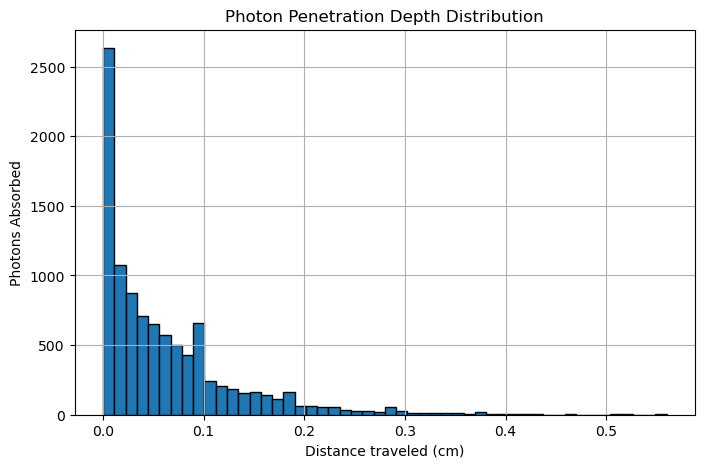

In [2]:
# Parameters
num_photons = 10000            # Number of photons to simulate
epsilon = 3000                 # Molar extinction coefficient (L·mol⁻¹·cm⁻¹)
concentration = 0.005         # Concentration of solute (mol·L⁻¹)
path_length = 1                # Total path length through solution (cm)
dx = 0.01                      # Step size (cm)


"""This takes the absorbance model for 10000 photons 
and runs how far the photon population is able to propagate """
absorbance, distances = Absorption_model(num_photons, path_length, epsilon, concentration, dx)
print("Total number of photons accounted for is: ", len(distances) )
plt.figure(figsize=(8, 5))
plt.hist(distances, bins=50, edgecolor='black', density=False)
plt.title("Photon Penetration Depth Distribution")
plt.xlabel("Distance traveled (cm)")
plt.ylabel("Photons Absorbed")
plt.grid(True)
plt.show()


In [3]:
from scipy.integrate import odeint
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
from timeit import default_timer as timer
import pprint
from numba import njit


def ODE_system_VariableF(y, t, p, cross_section, flux):
	'''
    Thedifference is in this case the flux driving the reaction
    from B--->C decreases directly as a result of the photons absorbed in A--->B
    The idea that I had was that each for each individual second that passes 1*quantum yield photons would be lost from the flux
	'''

	R1 = p[0] * y[1]
	R2 = p[1] * cross_section * flux * y[0]  
	R3 = p[2] * cross_section * flux *(1-p[1]*y[0]*t) * y[1]
	R6 = p[3] * y[2]
    
	ra = R1 - R2 + R6 
	rb = -R1 + R2 - R3
	rc = R3 - R6
	
	return [ra, rb, rc]

def ODE_explicit_rate_law_VariableF(p, initial_state, t, flux, cross_section, ravel = False):

	sol = odeint(ODE_system_VF, initial_state, t, args = (p, cross_section, flux))

	if ravel is True:
		sol = np.ravel(sol)
    
	return sol


"""These still need fixing but this is where I will add in the terms for fractional absorption 
and attempt to cmbine with the ODE system"""

'These still need fixing but this is where I will add in the terms for fractional absorption \nand attempt to cmbine with the ODE system'